In [1]:
import importlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from main.utils import data_manage_utils, train_utils

importlib.reload(train_utils)
importlib.reload(data_manage_utils)

loading_folder = "2024_06_16-0229"
loading_spec = "ADAB"

ROOT_PATH = os.path.abspath("../../")
TRAIN_DATA_FOLDER = os.path.join(ROOT_PATH, "data/training/training_results/", loading_spec, loading_folder)

# Finding corresponding prep data folder
settings_path = os.path.join(TRAIN_DATA_FOLDER, "estimation_settings.json")
PREP_DATA_FOLDER = data_manage_utils.find_data_path_by_settings_file(settings_path,ROOT_PATH)

In [2]:
pert_result_df_path = os.path.join(TRAIN_DATA_FOLDER,"pert_out_df.pkl.gz")

pert_df = pd.read_pickle(pert_result_df_path, compression="gzip")

pert_cols = list(set(pert_df.columns) - {"ARR_MIN_OF_DAY_COS", "ARR_MIN_OF_DAY_SIN", "ARR_DAY_SIN", "ARR_DAY_COS"})
USE_TH = False
if USE_TH:
    pert_cols = ["TEMP(C)","WIND_SPEED(KMH)","REL_HUMIDITY(PERCENT)","WIND_DRCT(DEG)", "SEA_LEVEL_PRESSURE(MILLIBAR)"]

pert_df

,DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,APPROACH_SPEED(KMH),TAIL_HEIGHT(M),PARKING_AREA(SQM),...,EVENT_GS,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,RUNWAY_ERROR(PERC),y_true,pert_id,y
0,77,51,64,0.974928,-0.222521,-0.831470,-0.555570,259.280,6.324600,560.293571,...,0,0,0,0,0,0,1.0,2,TEMP(C)<6386798>,2
1,77,51,64,0.974928,-0.222521,-0.831470,-0.555570,259.280,6.324600,560.293571,...,0,0,0,0,0,0,1.0,2,TEMP(C)<6386798>,2
2,77,51,64,0.974928,-0.222521,-0.831470,-0.555570,259.280,6.324600,560.293571,...,0,0,0,0,0,0,1.0,2,TEMP(C)<6386798>,2
3,77,51,64,0.974928,-0.222521,-0.831470,-0.555570,259.280,6.324600,560.293571,...,0,0,0,0,0,0,1.0,2,TEMP(C)<6386798>,2
4,77,51,64,0.974928,-0.222521,-0.831470,-0.555570,259.280,6.324600,560.293571,...,0,0,0,0,0,0,1.0,2,TEMP(C)<6386798>,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032127,-3,102,68,-0.433884,-0.900969,0.731354,-0.681998,264.836,13.639800,2071.070234,...,0,0,0,0,0,0,0.8,1,DEP_DELAY(MINS)<9980295>,1
10032128,-3,115,30,-0.433884,-0.900969,-0.342020,0.939693,261.132,12.624816,1445.094760,...,0,0,0,0,0,0,0.6,1,DEP_DELAY(MINS)<9983451>,1
10032129,54,86,75,0.781831,0.623490,-0.816642,0.577145,255.576,9.000744,1525.176514,...,0,0,0,0,0,0,0.6,2,DEP_DELAY(MINS)<7026317>,2
10032130,2,150,53,0.000000,1.000000,-0.980785,0.195090,261.132,12.624816,1445.094760,...,0,0,0,0,0,0,0.4,1,DEP_DELAY(MINS)<10352441>,1


In [3]:
y_test_pred = pd.DataFrame(data_manage_utils.load_numpy_from_pickle(os.path.join(TRAIN_DATA_FOLDER, "y_test_pred.pkl")))
y_test_pred

,0
0,2
1,0
2,1
3,2
4,0
...,...
65796,1
65797,1
65798,2
65799,1


In [4]:
X_test = pd.read_pickle(os.path.join(PREP_DATA_FOLDER, "X_test_df.pkl"))
y_test = pd.DataFrame(pd.read_pickle(os.path.join(PREP_DATA_FOLDER, "y_test_df.pkl")))
X_test

,DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,APPROACH_SPEED(KMH),TAIL_HEIGHT(M),PARKING_AREA(SQM),...,EVENT_FG,EVENT_FU,EVENT_GR,EVENT_GS,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,RUNWAY_ERROR(PERC)
6386798,77,51,64,0.974928,-0.222521,-0.831470,-0.555570,259.280,6.324600,560.293571,...,0,0,0,0,0,0,0,0,0,1.0
6824913,-7,95,72,0.433884,-0.900969,-0.402747,-0.915311,257.428,9.043416,1075.157934,...,0,0,0,0,0,0,0,0,0,0.4
7556876,-2,86,51,0.000000,1.000000,-0.768842,-0.639439,259.280,6.324600,560.293571,...,0,0,0,0,0,0,0,0,0,0.2
10772416,162,95,84,0.000000,1.000000,0.480989,-0.876727,233.352,12.109704,1153.939056,...,0,0,0,0,0,0,0,0,0,0.0
7282245,-11,181,63,-0.433884,-0.900969,-0.942641,-0.333807,233.352,12.109704,1153.939056,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980295,-3,102,68,-0.433884,-0.900969,0.731354,-0.681998,264.836,13.639800,2071.070234,...,0,0,0,0,0,0,0,0,0,0.8
9983451,-3,115,30,-0.433884,-0.900969,-0.342020,0.939693,261.132,12.624816,1445.094760,...,0,0,0,0,0,0,0,0,0,0.6
7026317,54,86,75,0.781831,0.623490,-0.816642,0.577145,255.576,9.000744,1525.176514,...,0,0,0,0,0,0,0,0,0,0.6
10352441,2,150,53,0.000000,1.000000,-0.980785,0.195090,261.132,12.624816,1445.094760,...,0,0,0,0,0,0,0,0,0,0.4


In [5]:
y_test

,ARR_DELAY_MINS
6386798,2
6824913,0
7556876,1
10772416,2
7282245,0
...,...
9980295,1
9983451,1
7026317,2
10352441,1


[Text(0, 0, '12547'), Text(0, 0, '46613'), Text(0, 0, '6641')]

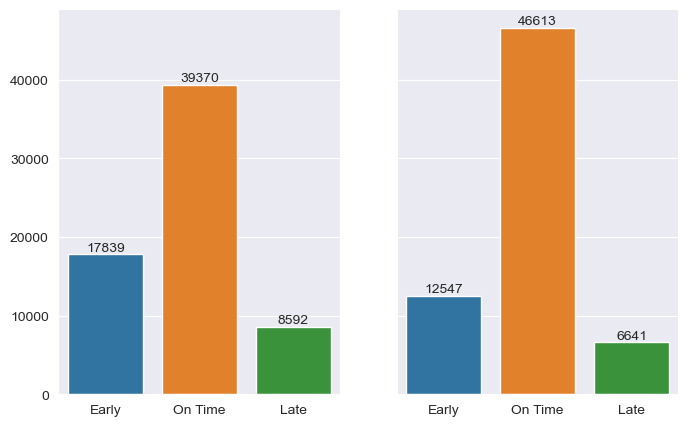

In [6]:
fig, axes = plt.subplots(1,2,figsize=(8,5), sharey=True)
sns.barplot(x=["Early", "On Time", "Late"], y=list(y_test.value_counts().sort_index()), ax=axes[0])
sns.barplot(x=["Early", "On Time", "Late"], y=list(y_test_pred.value_counts().sort_index()), ax=axes[1])
axes[0].bar_label(axes[0].containers[0])
axes[1].bar_label(axes[1].containers[0])

In [7]:
def print_measures(y_pred, y_true, true_labels):
    if type(y_pred) == pd.DataFrame:
        y_pred = y_pred[y_pred.columns[0]]
    if type(y_true) == pd.DataFrame:
        y_true = y_true[y_true.columns[0]]
    ret_dict = {}
    print(20*"-")
    print(f"Global measures")
    print(f"Number of entries: {len(y_pred)}")
    acc = accuracy_score(y_true=y_true, y_pred=y_pred, normalize=True)
    ret_dict.update({"acc" : acc})
    print(f"Accuracy: {acc:.5f}")
    print(f"Precision-µ: {precision_score(y_true=y_true, y_pred=y_pred, average='micro'):.5f}")
    print(f"Recall-µ: {recall_score(y_true=y_true, y_pred=y_pred, average='micro'):.5f}")
    print(f"F1-Score-µ: {f1_score(y_true=y_true, y_pred=y_pred, average='micro'):.5f}")
    print("=")
    print(f"Precision-M: {precision_score(y_true=y_true, y_pred=y_pred, average='macro'):.5f}")
    print(f"Recall-M: {recall_score(y_true=y_true, y_pred=y_pred, average='macro'):.5f}")
    print(f"F1-Score-M: {f1_score(y_true=y_true, y_pred=y_pred, average='macro'):.5f}")
    for label in true_labels:
        if (label in y_pred) or (label in y_true):
            y_pred_filtered = [1 if val == label else 0 for val in y_pred]
            y_true_filtered = [1 if val == label else 0 for val in y_true]
            print(20*"-")
            print(f"Measures for label '{label}'")
            print(f"Number of entries: {sum(y_true_filtered)}")
            prec = precision_score(y_true=y_true_filtered, y_pred=y_pred_filtered)
            print(f"Precision score: {prec:.5f}")
            print(f"Recall score: {recall_score(y_true=y_true_filtered, y_pred=y_pred_filtered):.5f}")
            ret_dict.update({"prec"+str(label) : prec})
    return ret_dict
real = print_measures(y_test_pred, y_test, [0,1,2])

--------------------
Global measures
Number of entries: 65801
Accuracy: 0.71462
Precision-µ: 0.71462
Recall-µ: 0.71462
F1-Score-µ: 0.71462
=
Precision-M: 0.73458
Recall-M: 0.65314
F1-Score-M: 0.68259
--------------------
Measures for label '0'
Number of entries: 17839
Precision score: 0.59066
Recall score: 0.41544
--------------------
Measures for label '1'
Number of entries: 39370
Precision score: 0.72300
Recall score: 0.85601
--------------------
Measures for label '2'
Number of entries: 8592
Precision score: 0.89008
Recall score: 0.68797


In [8]:
X_pert_res = pert_df.groupby("pert_id").agg({'y':['min','max']})["y"]
X_pert_res

,min,max
pert_id,,
CRS_ELAPSED_TIME(MINS)<10001243>,1,1
CRS_ELAPSED_TIME(MINS)<10003947>,1,1
CRS_ELAPSED_TIME(MINS)<10004727>,1,1
CRS_ELAPSED_TIME(MINS)<10006126>,1,1
CRS_ELAPSED_TIME(MINS)<10006791>,1,2
...,...,...
WINGLETS(YN)<9998396>,0,0
WINGLETS(YN)<9998430>,2,2
WINGLETS(YN)<9998460>,1,1


In [9]:
pert_alerts = X_pert_res[~(X_pert_res["min"] == X_pert_res["max"])]
pert_alerts

,min,max
pert_id,,
CRS_ELAPSED_TIME(MINS)<10006791>,1,2
CRS_ELAPSED_TIME(MINS)<10007455>,1,2
CRS_ELAPSED_TIME(MINS)<10007606>,0,1
CRS_ELAPSED_TIME(MINS)<10008429>,0,1
CRS_ELAPSED_TIME(MINS)<10009302>,0,1
...,...,...
WIND_SPEED(KMH)<9936723>,0,1
WIND_SPEED(KMH)<9936786>,1,2
WIND_SPEED(KMH)<9946817>,0,1


In [10]:
list(pert_alerts.index)
pert_df[pert_df["pert_id"].isin(list(pert_alerts.index))]

,DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,APPROACH_SPEED(KMH),TAIL_HEIGHT(M),PARKING_AREA(SQM),...,EVENT_GS,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,RUNWAY_ERROR(PERC),y_true,pert_id,y
14174,-3,170,51,0.000000,1.000000,0.173648,-0.984808,255.576,9.000744,1525.176514,...,0,0,0,0,0,0,0.0,0,TEMP(C)<7215829>,0
14175,-3,170,51,0.000000,1.000000,0.173648,-0.984808,255.576,9.000744,1525.176514,...,0,0,0,0,0,0,0.0,0,TEMP(C)<7215829>,0
14176,-3,170,51,0.000000,1.000000,0.173648,-0.984808,255.576,9.000744,1525.176514,...,0,0,0,0,0,0,0.0,0,TEMP(C)<7215829>,0
14177,-3,170,51,0.000000,1.000000,0.173648,-0.984808,255.576,9.000744,1525.176514,...,0,0,0,0,0,0,0.0,0,TEMP(C)<7215829>,0
14178,-3,170,51,0.000000,1.000000,0.173648,-0.984808,255.576,9.000744,1525.176514,...,0,0,0,0,0,0,0.0,0,TEMP(C)<7215829>,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715918,7,107,58,0.000000,1.000000,0.746057,-0.665882,257.428,9.043416,1075.157934,...,0,0,0,1,-1,0,1.0,2,EVENT_SN<10242660>,1
8715919,7,107,58,0.000000,1.000000,0.746057,-0.665882,257.428,9.043416,1075.157934,...,0,0,0,1,1,0,1.0,2,EVENT_SN<10242660>,2
8715935,-6,102,43,-0.433884,-0.900969,-0.838671,0.544639,255.576,9.000744,1525.176514,...,0,0,0,1,0,0,1.0,0,EVENT_SN<5697258>,0
8715936,-6,102,43,-0.433884,-0.900969,-0.838671,0.544639,255.576,9.000744,1525.176514,...,0,0,0,1,-1,0,1.0,0,EVENT_SN<5697258>,0


In [11]:
pert_outcomes = pert_df[pert_df.columns[-3:]]
pert_outcomes

,y_true,pert_id,y
0,2,TEMP(C)<6386798>,2
1,2,TEMP(C)<6386798>,2
2,2,TEMP(C)<6386798>,2
3,2,TEMP(C)<6386798>,2
4,2,TEMP(C)<6386798>,2
...,...,...,...
10032127,1,DEP_DELAY(MINS)<9980295>,1
10032128,1,DEP_DELAY(MINS)<9983451>,1
10032129,2,DEP_DELAY(MINS)<7026317>,2
10032130,1,DEP_DELAY(MINS)<10352441>,1


In [12]:
def disassemble_pert_id(row):
    s = row["pert_id"].split("<")
    col = s[0]
    idx = s[1][:-1]
    val = row[col]
    return [col,val,idx]

col_values = pert_df.apply(lambda row: disassemble_pert_id(row), axis=1)

In [13]:
col_values = pd.DataFrame(list(col_values.to_numpy()), columns=["column","val","idx"])
col_values

,column,val,idx
0,TEMP(C),17.222222,6386798
1,TEMP(C),17.212222,6386798
2,TEMP(C),17.232222,6386798
3,TEMP(C),17.202222,6386798
4,TEMP(C),17.242222,6386798
...,...,...,...
10032127,DEP_DELAY(MINS),-3.000000,9980295
10032128,DEP_DELAY(MINS),-3.000000,9983451
10032129,DEP_DELAY(MINS),54.000000,7026317
10032130,DEP_DELAY(MINS),2.000000,10352441


In [14]:
col_values[col_values["column"] == "REL_HUMIDITY(PERCENT)"]

,column,val,idx
2500438,REL_HUMIDITY(PERCENT),93.18000,6386798
2500439,REL_HUMIDITY(PERCENT),92.71410,6386798
2500440,REL_HUMIDITY(PERCENT),93.64590,6386798
2500441,REL_HUMIDITY(PERCENT),92.24820,6386798
2500442,REL_HUMIDITY(PERCENT),94.11180,6386798
...,...,...,...
3750652,REL_HUMIDITY(PERCENT),59.89545,6600848
3750653,REL_HUMIDITY(PERCENT),55.55520,6600848
3750654,REL_HUMIDITY(PERCENT),60.18480,6600848
3750655,REL_HUMIDITY(PERCENT),55.26585,6600848


In [15]:
pert_outcomes["column"] = list(col_values["column"])
pert_outcomes["val"] = list(col_values["val"])
pert_outcomes["idx"] = list(col_values["idx"])
pert_outcomes

C:\Users\chrig\AppData\Local\Temp\ipykernel_21976\1567013798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pert_outcomes["column"] = list(col_values["column"])
C:\Users\chrig\AppData\Local\Temp\ipykernel_21976\1567013798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pert_outcomes["val"] = list(col_values["val"])
C:\Users\chrig\AppData\Local\Temp\ipykernel_21976\1567013798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,y_true,pert_id,y,column,val,idx
0,2,TEMP(C)<6386798>,2,TEMP(C),17.222222,6386798
1,2,TEMP(C)<6386798>,2,TEMP(C),17.212222,6386798
2,2,TEMP(C)<6386798>,2,TEMP(C),17.232222,6386798
3,2,TEMP(C)<6386798>,2,TEMP(C),17.202222,6386798
4,2,TEMP(C)<6386798>,2,TEMP(C),17.242222,6386798
...,...,...,...,...,...,...
10032127,1,DEP_DELAY(MINS)<9980295>,1,DEP_DELAY(MINS),-3.000000,9980295
10032128,1,DEP_DELAY(MINS)<9983451>,1,DEP_DELAY(MINS),-3.000000,9983451
10032129,2,DEP_DELAY(MINS)<7026317>,2,DEP_DELAY(MINS),54.000000,7026317
10032130,1,DEP_DELAY(MINS)<10352441>,1,DEP_DELAY(MINS),2.000000,10352441


In [16]:
pert_view = pert_outcomes.groupby(["pert_id","y_true"]).first().reset_index().set_index('pert_id')
pert_view

,y_true,y,column,val,idx
pert_id,,,,,
CRS_ELAPSED_TIME(MINS)<10001243>,1,1,CRS_ELAPSED_TIME(MINS),78.0,10001243
CRS_ELAPSED_TIME(MINS)<10003947>,1,1,CRS_ELAPSED_TIME(MINS),133.0,10003947
CRS_ELAPSED_TIME(MINS)<10004727>,1,1,CRS_ELAPSED_TIME(MINS),221.0,10004727
CRS_ELAPSED_TIME(MINS)<10006126>,1,1,CRS_ELAPSED_TIME(MINS),176.0,10006126
CRS_ELAPSED_TIME(MINS)<10006791>,1,1,CRS_ELAPSED_TIME(MINS),290.0,10006791
...,...,...,...,...,...
WINGLETS(YN)<9998396>,0,0,WINGLETS(YN),0.0,9998396
WINGLETS(YN)<9998430>,2,2,WINGLETS(YN),1.0,9998430
WINGLETS(YN)<9998460>,1,1,WINGLETS(YN),0.0,9998460


In [17]:
if USE_TH:
    pert_view = pert_view[list(pert_view["column"].isin(pert_cols))]

In [18]:
pert_view["pert_alarm"] = [idx in pert_alerts.index for idx in pert_view.index]
faulty = pert_view[pert_view["y_true"] != pert_view["y"]]
faulty_and_changed = faulty[faulty["pert_alarm"]]
pert_view["class_error"] = [idx in faulty.index for idx in pert_view.index]
pert_view

,y_true,y,column,val,idx,pert_alarm,class_error
pert_id,,,,,,,
CRS_ELAPSED_TIME(MINS)<10001243>,1,1,CRS_ELAPSED_TIME(MINS),78.0,10001243,False,False
CRS_ELAPSED_TIME(MINS)<10003947>,1,1,CRS_ELAPSED_TIME(MINS),133.0,10003947,False,False
CRS_ELAPSED_TIME(MINS)<10004727>,1,1,CRS_ELAPSED_TIME(MINS),221.0,10004727,False,False
CRS_ELAPSED_TIME(MINS)<10006126>,1,1,CRS_ELAPSED_TIME(MINS),176.0,10006126,False,False
CRS_ELAPSED_TIME(MINS)<10006791>,1,1,CRS_ELAPSED_TIME(MINS),290.0,10006791,True,False
...,...,...,...,...,...,...,...
WINGLETS(YN)<9998396>,0,0,WINGLETS(YN),0.0,9998396,False,False
WINGLETS(YN)<9998430>,2,2,WINGLETS(YN),1.0,9998430,False,False
WINGLETS(YN)<9998460>,1,1,WINGLETS(YN),0.0,9998460,False,False


In [19]:
print(f"Wrong classification records for all perturbation options: {(len(pert_view[pert_view['class_error']])/len(pert_view))*100:.3f}%")
print(f"# of perturbation alarms for all perturbation options: {(len(pert_view[pert_view['pert_alarm']])/len(pert_view))*100:.3f}%")
print(f"Alarmed perturbation options that were wrongly classified: {(len(pert_view[pert_view['pert_alarm'] & pert_view['class_error']])/len(pert_view[pert_view['pert_alarm']]))*100:.3f}%")
print(f"Percentage of wrong classifications that were alarmed: {(len(pert_view[pert_view['pert_alarm'] & pert_view['class_error']])/len(pert_view[pert_view['class_error']]))*100:.3f}%")
print(f"Percentage of correct classifications that were alarmed: {(len(pert_view[pert_view['pert_alarm'] & pert_view['class_error']])/len(pert_view[pert_view['class_error'] == False]))*100:.3f}%")
print(f"Percentage of not alarmed options that were wrongly classified: {(len(pert_view[pert_view['class_error']])/len(pert_view[pert_view['pert_alarm'] == False]))*100:.3f}%")

Wrong classification records for all perturbation options: 28.538%
# of perturbation alarms for all perturbation options: 1.441%
Alarmed perturbation options that were wrongly classified: 48.055%
Percentage of wrong classifications that were alarmed: 2.426%
Percentage of correct classifications that were alarmed: 0.969%
Percentage of not alarmed options that were wrongly classified: 28.955%


In [20]:
cols = list(pert_view["column"].value_counts().index)
cols

['CRS_ELAPSED_TIME(MINS)',
 'NR_PREV_ARR_FLIGHTS(1HR)',
 'WIND_SPEED(KMH)',
 'WIND_DRCT(DEG)',
 'VISIBILITY(MILES)',
 'TEMP(C)',
 'SEA_LEVEL_PRESSURE(MILLIBAR)',
 'REL_HUMIDITY(PERCENT)',
 'EVENT_TS',
 'DEP_DELAY(MINS)',
 'EVENT_SN',
 'EVENT_RA',
 'EVENT_IC',
 'EVENT_FG',
 'EVENT_DZ',
 'EVENT_BR',
 'WINGLETS(YN)']

C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new ar

,y_true,y,column,val,pert_alarm,class_error
idx,,,,,,
10001243,1,1,CRS_ELAPSED_TIME(MINS),78.0,False,False
10003947,1,1,CRS_ELAPSED_TIME(MINS),133.0,False,False
10004727,1,1,CRS_ELAPSED_TIME(MINS),221.0,False,False
10006126,1,1,CRS_ELAPSED_TIME(MINS),176.0,False,False
10006791,1,1,CRS_ELAPSED_TIME(MINS),290.0,True,False
...,...,...,...,...,...,...
9998396,0,0,CRS_ELAPSED_TIME(MINS),117.0,False,False
9998430,2,2,CRS_ELAPSED_TIME(MINS),88.0,False,False
9998460,1,1,CRS_ELAPSED_TIME(MINS),68.0,False,False


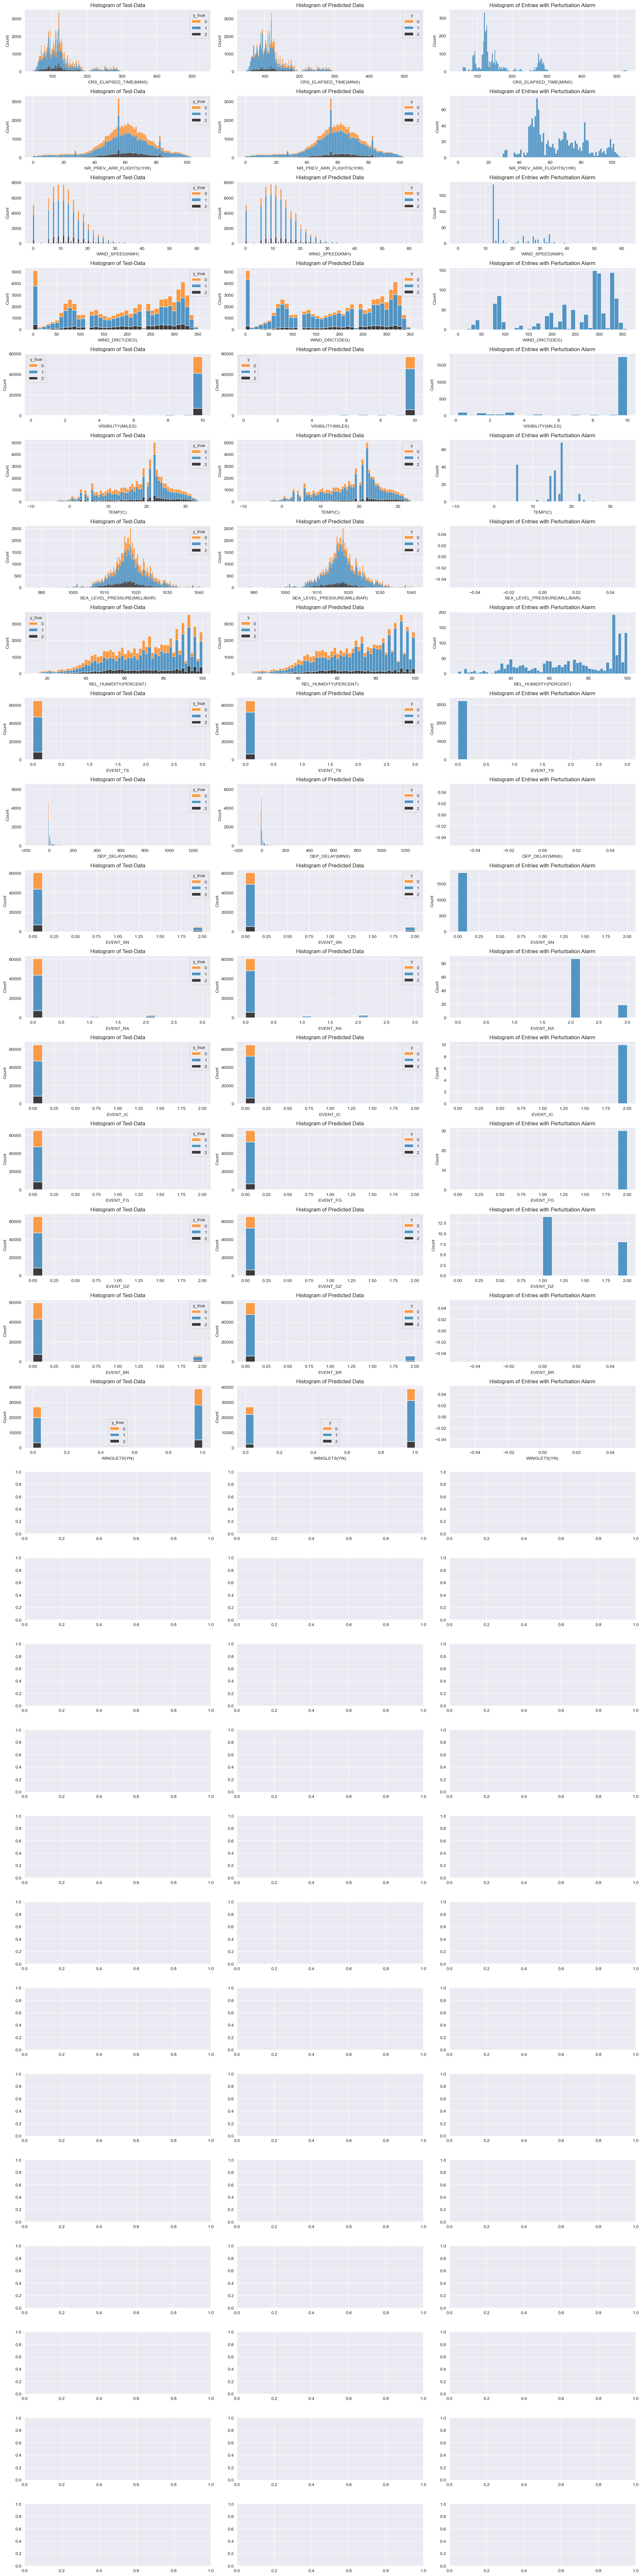

In [21]:
pert_view_alert = pert_view[pert_view["pert_alarm"] == True]

fig, axes = plt.subplots(len(pert_cols),3, figsize=(20,80))

count = 0
for col in cols:
    p_row = int(count / 3)
    bins = np.histogram_bin_edges(pert_view[pert_view["column"] == col]["val"], bins='auto')
    ax = sns.histplot(data = pert_view[pert_view["column"] == col], x = "val", hue="y_true", multiple="stack", ax=axes[p_row][0], bins=bins, palette = ["C1", "C0", "k"])
    axes[p_row][0].set_title("Histogram of Test-Data")
    ax.set(xlabel=col)
    ax = sns.histplot(data = pert_view[pert_view["column"] == col], x = "val", hue="y", multiple="stack", ax=axes[p_row][1], bins=bins, palette = ["C1", "C0", "k"])
    axes[p_row][1].set_title("Histogram of Predicted Data")
    ax.set(xlabel=col)
    ax = sns.histplot(data = pert_view_alert[pert_view_alert["column"] == col], x = "val", multiple="stack", ax=axes[p_row][2], bins = bins)
    axes[p_row][2].set_title("Histogram of Entries with Perturbation Alarm")
    ax.set(xlabel=col)
    count += 3
fig.tight_layout()
pert_view.groupby("idx").first()

In [22]:
def to_set(x):

    return set(x)

pert_view["y_outcomes"] = list(pert_outcomes[["pert_id" , "y"]].groupby("pert_id")["y"].apply(set).reset_index()["y"].to_numpy())
pert_view

,y_true,y,column,val,idx,pert_alarm,class_error,y_outcomes
pert_id,,,,,,,,
CRS_ELAPSED_TIME(MINS)<10001243>,1,1,CRS_ELAPSED_TIME(MINS),78.0,10001243,False,False,{1}
CRS_ELAPSED_TIME(MINS)<10003947>,1,1,CRS_ELAPSED_TIME(MINS),133.0,10003947,False,False,{1}
CRS_ELAPSED_TIME(MINS)<10004727>,1,1,CRS_ELAPSED_TIME(MINS),221.0,10004727,False,False,{1}
CRS_ELAPSED_TIME(MINS)<10006126>,1,1,CRS_ELAPSED_TIME(MINS),176.0,10006126,False,False,{1}
CRS_ELAPSED_TIME(MINS)<10006791>,1,1,CRS_ELAPSED_TIME(MINS),290.0,10006791,True,False,"{1, 2}"
...,...,...,...,...,...,...,...,...
WINGLETS(YN)<9998396>,0,0,WINGLETS(YN),0.0,9998396,False,False,{0}
WINGLETS(YN)<9998430>,2,2,WINGLETS(YN),1.0,9998430,False,False,{2}
WINGLETS(YN)<9998460>,1,1,WINGLETS(YN),0.0,9998460,False,False,{1}


In [23]:
def find_diff(x):
    return list(x.y_outcomes.difference({x.y}))

pert_view["changed_to"] = pert_view.apply( find_diff , axis = "columns")

In [24]:
def is_good_change(x):
    return x.y_true in x.changed_to

pert_view["corrected"] = list(pert_view[["y_true", "changed_to"]].apply(is_good_change, axis = "columns"))

In [25]:
def is_bad_change(x):
    if not x.class_error and x.changed_to:
        return True
    return False

pert_view["worsened"] = list(pert_view[["class_error", "changed_to"]].apply(is_bad_change, axis = "columns"))

In [26]:
pert_view

,y_true,y,column,val,idx,pert_alarm,class_error,y_outcomes,changed_to,corrected,worsened
pert_id,,,,,,,,,,,
CRS_ELAPSED_TIME(MINS)<10001243>,1,1,CRS_ELAPSED_TIME(MINS),78.0,10001243,False,False,{1},[],False,False
CRS_ELAPSED_TIME(MINS)<10003947>,1,1,CRS_ELAPSED_TIME(MINS),133.0,10003947,False,False,{1},[],False,False
CRS_ELAPSED_TIME(MINS)<10004727>,1,1,CRS_ELAPSED_TIME(MINS),221.0,10004727,False,False,{1},[],False,False
CRS_ELAPSED_TIME(MINS)<10006126>,1,1,CRS_ELAPSED_TIME(MINS),176.0,10006126,False,False,{1},[],False,False
CRS_ELAPSED_TIME(MINS)<10006791>,1,1,CRS_ELAPSED_TIME(MINS),290.0,10006791,True,False,"{1, 2}",[2],False,True
...,...,...,...,...,...,...,...,...,...,...,...
WINGLETS(YN)<9998396>,0,0,WINGLETS(YN),0.0,9998396,False,False,{0},[],False,False
WINGLETS(YN)<9998430>,2,2,WINGLETS(YN),1.0,9998430,False,False,{2},[],False,False
WINGLETS(YN)<9998460>,1,1,WINGLETS(YN),0.0,9998460,False,False,{1},[],False,False


In [27]:
def get_first(x):
    return x[0]

def find_union(x):
    return set().union(*x)

def get_indicator(x):
    return sum(x) / len(pert_cols)

pert_test_results = pert_view.groupby("idx").agg({"y_true" : get_first, "y" : pd.Series.mode, "pert_alarm" : max, "y_outcomes" : find_union, "changed_to" : find_union, "corrected" : get_indicator , "worsened" : get_indicator})
pert_test_results

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened
idx,,,,,,,
10001243,1,1,False,{1},{},0.000000,0.000000
10003947,1,1,False,{1},{},0.000000,0.000000
10004727,1,1,False,{1},{},0.000000,0.000000
10006126,1,1,False,{1},{},0.000000,0.000000
10006791,1,1,True,"{1, 2}",{2},0.000000,0.066667
...,...,...,...,...,...,...,...
9998396,0,0,False,{0},{},0.000000,0.000000
9998430,2,2,True,"{1, 2}",{1},0.000000,0.033333
9998460,1,1,False,{1},{},0.000000,0.000000


In [28]:
pert_test_results[pert_test_results["pert_alarm"]]

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened
idx,,,,,,,
10006791,1,1,True,"{1, 2}",{2},0.000000,0.066667
10007195,2,2,True,"{1, 2}",{1},0.000000,0.033333
10007286,2,2,True,"{1, 2}",{1},0.000000,0.033333
10007455,1,2,True,"{1, 2}",{1},0.166667,0.000000
10007456,2,2,True,"{1, 2}",{1},0.000000,0.033333
...,...,...,...,...,...,...,...
9997601,1,0,True,"{0, 1}",{1},0.033333,0.000000
9997905,1,1,True,"{0, 1}",{0},0.000000,0.066667
9998159,1,1,True,"{0, 1}",{0},0.000000,0.066667


In [29]:
pert_test_results[pert_test_results["pert_alarm"] == False]

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened
idx,,,,,,,
10001243,1,1,False,{1},{},0.0,0.0
10003947,1,1,False,{1},{},0.0,0.0
10004727,1,1,False,{1},{},0.0,0.0
10006126,1,1,False,{1},{},0.0,0.0
10007221,1,1,False,{1},{},0.0,0.0
...,...,...,...,...,...,...,...
9998375,1,1,False,{1},{},0.0,0.0
9998376,1,1,False,{1},{},0.0,0.0
9998396,0,0,False,{0},{},0.0,0.0


In [30]:
alarm = print_measures(list(pert_test_results[pert_test_results["pert_alarm"] == True]["y"]), list(pert_test_results[pert_test_results["pert_alarm"] == True]["y_true"]), [0,1,2])

--------------------
Global measures
Number of entries: 7840
Accuracy: 0.53138
Precision-µ: 0.53138
Recall-µ: 0.53138
F1-Score-µ: 0.53138
=
Precision-M: 0.57418
Recall-M: 0.52744
F1-Score-M: 0.54552
--------------------
Measures for label '0'
Number of entries: 3142
Precision score: 0.50886
Recall score: 0.43889
--------------------
Measures for label '1'
Number of entries: 3808
Precision score: 0.51993
Recall score: 0.60636
--------------------
Measures for label '2'
Number of entries: 890
Precision score: 0.69376
Recall score: 0.53708


In [31]:
no_alarm = print_measures(list(pert_test_results[pert_test_results["pert_alarm"] == False]["y"]), list(pert_test_results[pert_test_results["pert_alarm"] == False]["y_true"]), [0,1,2])

--------------------
Global measures
Number of entries: 57961
Accuracy: 0.73941
Precision-µ: 0.73941
Recall-µ: 0.73941
F1-Score-µ: 0.73941
=
Precision-M: 0.75679
Recall-M: 0.66619
F1-Score-M: 0.69840
--------------------
Measures for label '0'
Number of entries: 14697
Precision score: 0.61320
Recall score: 0.41042
--------------------
Measures for label '1'
Number of entries: 35562
Precision score: 0.74438
Recall score: 0.88274
--------------------
Measures for label '2'
Number of entries: 7702
Precision score: 0.91280
Recall score: 0.70540


In [32]:
pert_test_results[pert_test_results["corrected"] > 0.25]

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened
idx,,,,,,,


In [33]:
pert_test_results[pert_test_results["worsened"] > 0]

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened
idx,,,,,,,
10006791,1,1,True,"{1, 2}",{2},0.0,0.066667
10007195,2,2,True,"{1, 2}",{1},0.0,0.033333
10007286,2,2,True,"{1, 2}",{1},0.0,0.033333
10007456,2,2,True,"{1, 2}",{1},0.0,0.033333
10008362,2,2,True,"{1, 2}",{1},0.0,0.033333
...,...,...,...,...,...,...,...
9992542,1,1,True,"{0, 1}",{0},0.0,0.133333
9992634,2,2,True,"{1, 2}",{1},0.0,0.033333
9997905,1,1,True,"{0, 1}",{0},0.0,0.066667


[(0.0, 0.25)]

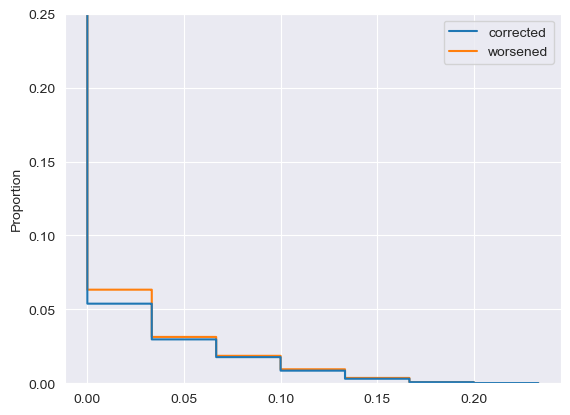

In [34]:
ax = sns.ecdfplot(data=pert_test_results[["corrected", "worsened"]], complementary=True)
ax.set(ylim=(0,0.25))

In [35]:
pert_test_results[pert_test_results["y_outcomes"].map(len) > 2]

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened
idx,,,,,,,
8652894,0,1,True,"{0, 1, 2}","{0, 2}",0.033333,0.0


In [36]:
pert_test_results["correct"] = pert_test_results["y_true"] == pert_test_results["y"]
pert_test_results

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened,correct
idx,,,,,,,,
10001243,1,1,False,{1},{},0.000000,0.000000,True
10003947,1,1,False,{1},{},0.000000,0.000000,True
10004727,1,1,False,{1},{},0.000000,0.000000,True
10006126,1,1,False,{1},{},0.000000,0.000000,True
10006791,1,1,True,"{1, 2}",{2},0.000000,0.066667,True
...,...,...,...,...,...,...,...,...
9998396,0,0,False,{0},{},0.000000,0.000000,True
9998430,2,2,True,"{1, 2}",{1},0.000000,0.033333,True
9998460,1,1,False,{1},{},0.000000,0.000000,True


<AxesSubplot:xlabel='pert_alarm', ylabel='count'>

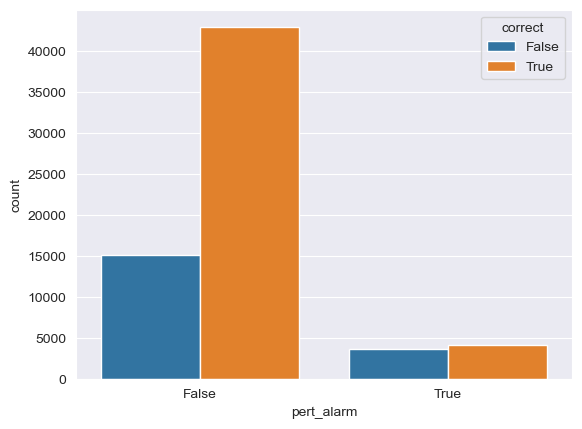

In [37]:
sns.countplot(data = pert_test_results, x="pert_alarm", hue="correct")

In [38]:
def correct_mistakes(row):
    if row.pert_alarm:
        return row.y_true
    else:
        return row.y

def force_mistakes(row):
    if row.worsened >= 0.3 and row.changed_to:
        return random.sample(row.changed_to,1)[0]
    else:
        return row.y

def force_corrections(row):
    if row.corrected >= 0.3:
        return row.y_true
    else:
        return row.y

pert_test_results["y_corrected"] = pert_test_results.apply(correct_mistakes, axis="columns")
pert_test_results["y_forced_mistake"] = pert_test_results.apply(force_mistakes, axis="columns")
pert_test_results["y_forced_correction"] = pert_test_results.apply(force_corrections, axis="columns")

In [39]:
pert_test_results

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened,correct,y_corrected,y_forced_mistake,y_forced_correction
idx,,,,,,,,,,,
10001243,1,1,False,{1},{},0.000000,0.000000,True,1,1,1
10003947,1,1,False,{1},{},0.000000,0.000000,True,1,1,1
10004727,1,1,False,{1},{},0.000000,0.000000,True,1,1,1
10006126,1,1,False,{1},{},0.000000,0.000000,True,1,1,1
10006791,1,1,True,"{1, 2}",{2},0.000000,0.066667,True,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9998396,0,0,False,{0},{},0.000000,0.000000,True,0,0,0
9998430,2,2,True,"{1, 2}",{1},0.000000,0.033333,True,2,2,2
9998460,1,1,False,{1},{},0.000000,0.000000,True,1,1,1


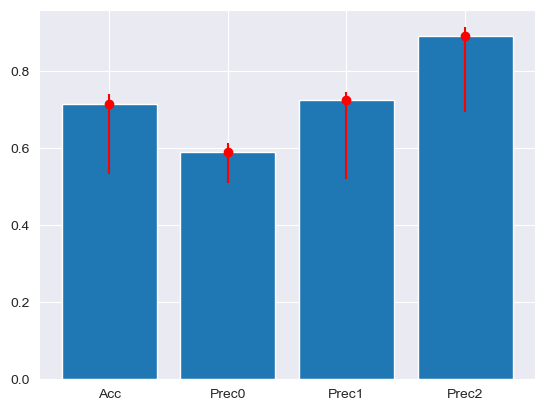

In [40]:
y_errormin = [alarm.get("acc"), alarm.get("prec0"), alarm.get("prec1"), alarm.get("prec2")]
y_errormax = [no_alarm.get("acc"), no_alarm.get("prec0"), no_alarm.get("prec1"), no_alarm.get("prec2")]
y_error = [y_errormin, y_errormax]
y = [real.get("acc"), real.get("prec0"), real.get("prec1"), real.get("prec2")]
for c, v in enumerate(y_errormin):
    y_errormin[c] = y[c] - v
for c, v in enumerate(y_errormax):
    y_errormax[c] = v - y[c]
x = ["Acc", "Prec0", "Prec1", "Prec2"]
plt.bar(x,y)
plt.errorbar(x,y, yerr=y_error, fmt='o', color="r")
plt.show()

In [41]:
print(f"Real values {real}")
print(f"Alarmed values {alarm}")
print(f"Non-alarmed values {no_alarm}")

Real values {'acc': 0.7146243978055045, 'prec0': 0.590659121702399, 'prec1': 0.7229957308047111, 'prec2': 0.8900767956633037}
Alarmed values {'acc': 0.5313775510204082, 'prec0': 0.5088560885608856, 'prec1': 0.5199279441567215, 'prec2': 0.6937590711175616}
Non-alarmed values {'acc': 0.739410983247356, 'prec0': 0.6131950798007523, 'prec1': 0.7443801574504411, 'prec2': 0.9128024193548387}


In [42]:
# Scores when all alerted entries are corrected
print_measures(list(pert_test_results["y_corrected"]), list(pert_test_results["y_true"]), [0,1,2])

--------------------
Global measures
Number of entries: 65801
Accuracy: 0.77046
Precision-µ: 0.77046
Recall-µ: 0.77046
F1-Score-µ: 0.77046
=
Precision-M: 0.79884
Recall-M: 0.71476
F1-Score-M: 0.74652
--------------------
Measures for label '0'
Number of entries: 17839
Precision score: 0.70683
Recall score: 0.51427
--------------------
Measures for label '1'
Number of entries: 39370
Precision score: 0.76555
Recall score: 0.89408
--------------------
Measures for label '2'
Number of entries: 8592
Precision score: 0.92414
Recall score: 0.73592


{'acc': 0.7704594155104025,
 'prec0': 0.7068341166499731,
 'prec1': 0.7655502392344498,
 'prec2': 0.9241449868459515}

In [43]:
# Scores when all alerted entries discarded
print_measures(list(pert_test_results[pert_test_results["pert_alarm"] == False]["y"]), list(pert_test_results[pert_test_results["pert_alarm"] == False]["y_true"]), [0,1,2])

--------------------
Global measures
Number of entries: 57961
Accuracy: 0.73941
Precision-µ: 0.73941
Recall-µ: 0.73941
F1-Score-µ: 0.73941
=
Precision-M: 0.75679
Recall-M: 0.66619
F1-Score-M: 0.69840
--------------------
Measures for label '0'
Number of entries: 14697
Precision score: 0.61320
Recall score: 0.41042
--------------------
Measures for label '1'
Number of entries: 35562
Precision score: 0.74438
Recall score: 0.88274
--------------------
Measures for label '2'
Number of entries: 7702
Precision score: 0.91280
Recall score: 0.70540


{'acc': 0.739410983247356,
 'prec0': 0.6131950798007523,
 'prec1': 0.7443801574504411,
 'prec2': 0.9128024193548387}

In [44]:
#Scores when all strongly changed perturbations are corrected
print_measures(list(pert_test_results["y_forced_correction"]), list(pert_test_results["y_true"]), [0,1,2])

--------------------
Global measures
Number of entries: 65801
Accuracy: 0.71462
Precision-µ: 0.71462
Recall-µ: 0.71462
F1-Score-µ: 0.71462
=
Precision-M: 0.73458
Recall-M: 0.65314
F1-Score-M: 0.68259
--------------------
Measures for label '0'
Number of entries: 17839
Precision score: 0.59066
Recall score: 0.41544
--------------------
Measures for label '1'
Number of entries: 39370
Precision score: 0.72300
Recall score: 0.85601
--------------------
Measures for label '2'
Number of entries: 8592
Precision score: 0.89008
Recall score: 0.68797


{'acc': 0.7146243978055045,
 'prec0': 0.590659121702399,
 'prec1': 0.7229957308047111,
 'prec2': 0.8900767956633037}

In [45]:
#Scores when all strongly changed perturbations are changed to wrong entries
print_measures(list(pert_test_results["y_forced_mistake"]), list(pert_test_results["y_true"]), [0,1,2])

--------------------
Global measures
Number of entries: 65801
Accuracy: 0.71462
Precision-µ: 0.71462
Recall-µ: 0.71462
F1-Score-µ: 0.71462
=
Precision-M: 0.73458
Recall-M: 0.65314
F1-Score-M: 0.68259
--------------------
Measures for label '0'
Number of entries: 17839
Precision score: 0.59066
Recall score: 0.41544
--------------------
Measures for label '1'
Number of entries: 39370
Precision score: 0.72300
Recall score: 0.85601
--------------------
Measures for label '2'
Number of entries: 8592
Precision score: 0.89008
Recall score: 0.68797


{'acc': 0.7146243978055045,
 'prec0': 0.590659121702399,
 'prec1': 0.7229957308047111,
 'prec2': 0.8900767956633037}

## Local Accuracy

In [46]:
pert_test_results

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened,correct,y_corrected,y_forced_mistake,y_forced_correction
idx,,,,,,,,,,,
10001243,1,1,False,{1},{},0.000000,0.000000,True,1,1,1
10003947,1,1,False,{1},{},0.000000,0.000000,True,1,1,1
10004727,1,1,False,{1},{},0.000000,0.000000,True,1,1,1
10006126,1,1,False,{1},{},0.000000,0.000000,True,1,1,1
10006791,1,1,True,"{1, 2}",{2},0.000000,0.066667,True,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9998396,0,0,False,{0},{},0.000000,0.000000,True,0,0,0
9998430,2,2,True,"{1, 2}",{1},0.000000,0.033333,True,2,2,2
9998460,1,1,False,{1},{},0.000000,0.000000,True,1,1,1


In [47]:
# Finding corresponding indexes
correct_indexes = pert_test_results.index[pert_test_results['correct'] == True].tolist()
false_indexes = pert_test_results.index[pert_test_results['correct'] == False].tolist()
alarm_indexes = pert_test_results.index[pert_test_results['pert_alarm'] == True].tolist()

In [48]:
X_test

,DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,APPROACH_SPEED(KMH),TAIL_HEIGHT(M),PARKING_AREA(SQM),...,EVENT_FG,EVENT_FU,EVENT_GR,EVENT_GS,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,RUNWAY_ERROR(PERC)
6386798,77,51,64,0.974928,-0.222521,-0.831470,-0.555570,259.280,6.324600,560.293571,...,0,0,0,0,0,0,0,0,0,1.0
6824913,-7,95,72,0.433884,-0.900969,-0.402747,-0.915311,257.428,9.043416,1075.157934,...,0,0,0,0,0,0,0,0,0,0.4
7556876,-2,86,51,0.000000,1.000000,-0.768842,-0.639439,259.280,6.324600,560.293571,...,0,0,0,0,0,0,0,0,0,0.2
10772416,162,95,84,0.000000,1.000000,0.480989,-0.876727,233.352,12.109704,1153.939056,...,0,0,0,0,0,0,0,0,0,0.0
7282245,-11,181,63,-0.433884,-0.900969,-0.942641,-0.333807,233.352,12.109704,1153.939056,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980295,-3,102,68,-0.433884,-0.900969,0.731354,-0.681998,264.836,13.639800,2071.070234,...,0,0,0,0,0,0,0,0,0,0.8
9983451,-3,115,30,-0.433884,-0.900969,-0.342020,0.939693,261.132,12.624816,1445.094760,...,0,0,0,0,0,0,0,0,0,0.6
7026317,54,86,75,0.781831,0.623490,-0.816642,0.577145,255.576,9.000744,1525.176514,...,0,0,0,0,0,0,0,0,0,0.6
10352441,2,150,53,0.000000,1.000000,-0.980785,0.195090,261.132,12.624816,1445.094760,...,0,0,0,0,0,0,0,0,0,0.4


In [49]:
# Find correct vs false fraction
frac_fc = len(false_indexes) / len(correct_indexes) 
frac_alarm = len(alarm_indexes) / len(X_test.index)
print(f"Fraction false vs. correct is: {frac_fc:.4f} (Rounded)")
print(f"Fraction alarm vs. no alarm is: {frac_alarm:.4f} (Rounded)")

Fraction false vs. correct is: 0.3993 (Rounded)
Fraction alarm vs. no alarm is: 0.1191 (Rounded)


In [50]:
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from main.utils import time_utils

# Scaling Test-Data
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test, y_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Sample X_test
sample_idxs = list(pert_test_results.groupby("pert_alarm", group_keys=False).apply(lambda x: x.sample(frac = 0.1)).index.astype(int))
X_test_sampled = X_test_scaled.loc[sorted(sample_idxs)]
X_test_sampled.index = range(len(X_test_sampled.index))
X_test_sampled

,DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,APPROACH_SPEED(KMH),TAIL_HEIGHT(M),PARKING_AREA(SQM),...,EVENT_FG,EVENT_FU,EVENT_GR,EVENT_GS,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,RUNWAY_ERROR(PERC)
0,-0.406480,-0.338333,-0.724184,-1.179173,0.876772,-1.034173,0.014294,0.335079,-1.654315,-1.808123,...,8.468075,-0.084363,-0.003898,-0.003898,-0.045004,-0.115753,1.567023,-0.295764,-0.120373,1.168149
1,-0.191709,-0.546340,-0.342940,-1.179173,0.876772,1.481629,-0.520779,-0.296069,-0.536964,0.376109,...,-0.118091,-0.084363,-0.003898,-0.003898,-0.045004,-0.115753,1.567023,-0.295764,-0.120373,1.168149
2,-0.342049,-0.640888,-1.377744,-1.179173,0.876772,-0.897093,1.388753,0.019505,-0.519148,-0.642610,...,-0.118091,-0.084363,-0.003898,-0.003898,-0.045004,-0.115753,1.567023,-0.295764,-0.120373,1.168149
3,0.624422,-0.754346,-0.506330,-1.179173,0.876772,1.563225,-0.401115,-0.296069,-0.536964,0.376109,...,-0.118091,-0.084363,-0.003898,-0.003898,-0.045004,-0.115753,1.567023,-0.295764,-0.120373,1.168149
4,-0.299095,-0.565249,-1.704525,-1.179173,0.876772,0.650042,-1.075010,1.281802,1.399947,1.611864,...,-0.118091,-0.084363,-0.003898,-0.003898,-0.045004,-0.115753,1.567023,-0.295764,-0.120373,1.168149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575,0.066017,-0.054689,-1.486671,-1.179173,0.876772,-0.053170,-1.042338,-0.296069,-0.536964,0.376109,...,-0.118091,-0.084363,-0.003898,-0.003898,-0.045004,-0.115753,-0.276463,-0.295764,-0.120373,-2.021524
6576,-0.170232,1.987552,-1.650062,-1.179173,0.876772,0.046107,-1.070582,0.335079,0.757280,0.359495,...,-0.118091,-0.084363,-0.003898,-0.003898,-0.045004,-0.115753,-0.276463,-0.295764,-0.120373,-2.021524
6577,-0.127278,-0.413972,-1.268818,-1.179173,0.876772,0.618603,-1.081777,-0.296069,-0.536964,0.376109,...,-0.118091,-0.084363,-0.003898,-0.003898,-0.045004,-0.115753,-0.276463,-0.295764,-0.120373,-2.021524
6578,0.237834,-0.224876,-0.669720,-1.179173,0.876772,0.966028,-0.959995,0.650654,0.976168,0.194826,...,-0.118091,-0.084363,-0.003898,-0.003898,-0.045004,-0.115753,-0.276463,-0.295764,-0.120373,-2.021524


In [51]:
# Sample y_test
y_test_true_sampled = y_test.loc[sorted(sample_idxs)]
y_test_true_sampled.index = range(len(y_test_true_sampled.index))

y_test_pred_sampled = y_test_pred.copy()
y_test_pred_sampled.index = y_test.index
y_test_pred_sampled = y_test_pred_sampled.loc[sorted(sample_idxs)]
y_test_pred_sampled.index = range(len(y_test_pred_sampled.index))
y_test_pred_sampled

,0
0,1
1,1
2,1
3,2
4,1
...,...
6575,1
6576,0
6577,1
6578,1


In [52]:
def calc_manh_dist_matrix(X: pd.DataFrame):   
    X = X.to_numpy()
    n = X.shape[0]
    D = np.zeros((n,n))
    D_asym = np.zeros((n,n))
    start, start_str = time_utils.print_time()
    print(f"Start distance calc at {start_str}")
    for i in range(n):
        print(f"{i+1}/{n}:")
        for j in range(i,n):
            D[i,j] = distance.cityblock(X[i], X[j])
            D[j,i] =  D[i,j]
            D_asym[i,j] = D[i,j]
            D_asym[j,i] = np.nan
    end, end_str = time_utils.print_time()
    print(f"End distance calc at {end_str}\n Took time: {end-start}")
    return D, D_asym

In [53]:
distance_matrix, dist_matrix_asym = calc_manh_dist_matrix(X_test_sampled)
distance_matrix

Start distance calc at 2024_06_16 23:47
1/6580:
2/6580:
3/6580:
4/6580:
5/6580:
6/6580:
7/6580:
8/6580:
9/6580:
10/6580:
11/6580:
12/6580:
13/6580:
14/6580:
15/6580:
16/6580:
17/6580:
18/6580:
19/6580:
20/6580:
21/6580:
22/6580:
23/6580:
24/6580:
25/6580:
26/6580:
27/6580:
28/6580:
29/6580:
30/6580:
31/6580:
32/6580:
33/6580:
34/6580:
35/6580:
36/6580:
37/6580:
38/6580:
39/6580:
40/6580:
41/6580:
42/6580:
43/6580:
44/6580:
45/6580:
46/6580:
47/6580:
48/6580:
49/6580:
50/6580:
51/6580:
52/6580:
53/6580:
54/6580:
55/6580:
56/6580:
57/6580:
58/6580:
59/6580:
60/6580:
61/6580:
62/6580:
63/6580:
64/6580:
65/6580:
66/6580:
67/6580:
68/6580:
69/6580:
70/6580:
71/6580:
72/6580:
73/6580:
74/6580:
75/6580:
76/6580:
77/6580:
78/6580:
79/6580:
80/6580:
81/6580:
82/6580:
83/6580:
84/6580:
85/6580:
86/6580:
87/6580:
88/6580:
89/6580:
90/6580:
91/6580:
92/6580:
93/6580:
94/6580:
95/6580:
96/6580:
97/6580:
98/6580:
99/6580:
100/6580:
101/6580:
102/6580:
103/6580:
104/6580:
105/6580:
106/6580:
107/6580

array([[ 0.        , 26.80135815, 36.69320601, ..., 33.77303925,
        36.96203369, 34.24832332],
       [26.80135815,  0.        , 29.79696664, ..., 18.72782254,
        22.88918009, 19.27739658],
       [36.69320601, 29.79696664,  0.        , ..., 43.55850365,
        44.51492756, 43.9672112 ],
       ...,
       [33.77303925, 18.72782254, 43.55850365, ...,  0.        ,
         6.29796757,  0.8797046 ],
       [36.96203369, 22.88918009, 44.51492756, ...,  6.29796757,
         0.        ,  6.59821161],
       [34.24832332, 19.27739658, 43.9672112 , ...,  0.8797046 ,
         6.59821161,  0.        ]])

In [54]:
np.fill_diagonal(distance_matrix, np.nan)
distance_matrix

array([[        nan, 26.80135815, 36.69320601, ..., 33.77303925,
        36.96203369, 34.24832332],
       [26.80135815,         nan, 29.79696664, ..., 18.72782254,
        22.88918009, 19.27739658],
       [36.69320601, 29.79696664,         nan, ..., 43.55850365,
        44.51492756, 43.9672112 ],
       ...,
       [33.77303925, 18.72782254, 43.55850365, ...,         nan,
         6.29796757,  0.8797046 ],
       [36.96203369, 22.88918009, 44.51492756, ...,  6.29796757,
                nan,  6.59821161],
       [34.24832332, 19.27739658, 43.9672112 , ...,  0.8797046 ,
         6.59821161,         nan]])

In [55]:
distance_list = distance_matrix.flatten()
distance_list = list(distance_list[~np.isnan(distance_list)])

print(f"Number of entries: {len(distance_list)}")

Number of entries: 43289820


<AxesSubplot:>

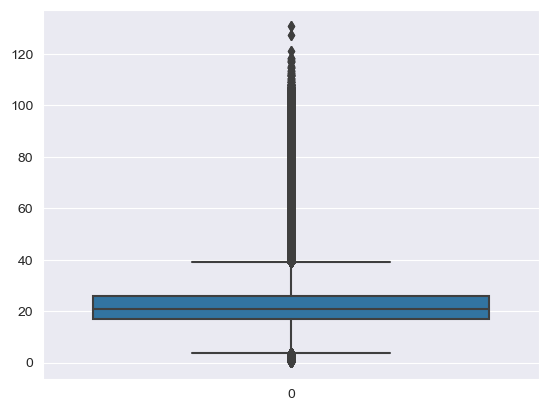

In [56]:
sns.boxplot(distance_list)

In [57]:
neigh_thresh = np.percentile(distance_list,0.2)
neigh_thresh

6.712839639442792

In [58]:
np.fill_diagonal(dist_matrix_asym, 0)
boolean_mask = np.where((dist_matrix_asym < neigh_thresh) & (~np.isnan(dist_matrix_asym)), True, False)
boolean_mask

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

In [59]:
true_indices_list = []
for row in boolean_mask:
    true_indices = np.where(row)[0]
    true_indices_list.append(true_indices.tolist())
true_indices_list

[[0],
 [1, 3],
 [2, 7, 10],
 [3],
 [4, 5],
 [5],
 [6, 8],
 [7],
 [8],
 [9],
 [10],
 [11, 22],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22, 23],
 [23],
 [24, 1600, 4557],
 [25],
 [26,
  27,
  29,
  32,
  36,
  42,
  45,
  46,
  691,
  887,
  1477,
  1567,
  1602,
  1713,
  1719,
  1725,
  2072,
  2075,
  2427,
  2432,
  2565,
  2591,
  2666,
  2689,
  2814,
  3062,
  3199,
  3719,
  3724,
  3736,
  3996,
  3997,
  4145,
  4149,
  4162,
  4785,
  5434,
  5435,
  5445,
  5447,
  5966,
  6268,
  6272,
  6424,
  6427],
 [27,
  29,
  36,
  42,
  691,
  887,
  1567,
  1719,
  1725,
  2072,
  2075,
  2391,
  2689,
  3719,
  3722,
  4785,
  4933,
  5435,
  5966,
  6272],
 [28, 35, 689],
 [29,
  36,
  684,
  1494,
  1602,
  1725,
  1948,
  1952,
  2072,
  2431,
  2582,
  2689,
  2787,
  2811,
  3565,
  3723,
  4148,
  4159,
  4555,
  4559,
  5439,
  5709,
  5958,
  5960,
  5962],
 [30, 38, 43, 1597],
 [31, 44],
 [32,
  36,
  38,
  46,
  351,
  685,
  1498,
  1722,


In [60]:
np.median([len(elem) for elem in true_indices_list])

4.0

In [61]:
X_test_sampled

,DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,APPROACH_SPEED(KMH),TAIL_HEIGHT(M),PARKING_AREA(SQM),...,EVENT_FG,EVENT_FU,EVENT_GR,EVENT_GS,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,RUNWAY_ERROR(PERC)
0,-0.406480,-0.338333,-0.724184,-1.179173,0.876772,-1.034173,0.014294,0.335079,-1.654315,-1.808123,...,8.468075,-0.084363,-0.003898,-0.003898,-0.045004,-0.115753,1.567023,-0.295764,-0.120373,1.168149
1,-0.191709,-0.546340,-0.342940,-1.179173,0.876772,1.481629,-0.520779,-0.296069,-0.536964,0.376109,...,-0.118091,-0.084363,-0.003898,-0.003898,-0.045004,-0.115753,1.567023,-0.295764,-0.120373,1.168149
2,-0.342049,-0.640888,-1.377744,-1.179173,0.876772,-0.897093,1.388753,0.019505,-0.519148,-0.642610,...,-0.118091,-0.084363,-0.003898,-0.003898,-0.045004,-0.115753,1.567023,-0.295764,-0.120373,1.168149
3,0.624422,-0.754346,-0.506330,-1.179173,0.876772,1.563225,-0.401115,-0.296069,-0.536964,0.376109,...,-0.118091,-0.084363,-0.003898,-0.003898,-0.045004,-0.115753,1.567023,-0.295764,-0.120373,1.168149
4,-0.299095,-0.565249,-1.704525,-1.179173,0.876772,0.650042,-1.075010,1.281802,1.399947,1.611864,...,-0.118091,-0.084363,-0.003898,-0.003898,-0.045004,-0.115753,1.567023,-0.295764,-0.120373,1.168149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575,0.066017,-0.054689,-1.486671,-1.179173,0.876772,-0.053170,-1.042338,-0.296069,-0.536964,0.376109,...,-0.118091,-0.084363,-0.003898,-0.003898,-0.045004,-0.115753,-0.276463,-0.295764,-0.120373,-2.021524
6576,-0.170232,1.987552,-1.650062,-1.179173,0.876772,0.046107,-1.070582,0.335079,0.757280,0.359495,...,-0.118091,-0.084363,-0.003898,-0.003898,-0.045004,-0.115753,-0.276463,-0.295764,-0.120373,-2.021524
6577,-0.127278,-0.413972,-1.268818,-1.179173,0.876772,0.618603,-1.081777,-0.296069,-0.536964,0.376109,...,-0.118091,-0.084363,-0.003898,-0.003898,-0.045004,-0.115753,-0.276463,-0.295764,-0.120373,-2.021524
6578,0.237834,-0.224876,-0.669720,-1.179173,0.876772,0.966028,-0.959995,0.650654,0.976168,0.194826,...,-0.118091,-0.084363,-0.003898,-0.003898,-0.045004,-0.115753,-0.276463,-0.295764,-0.120373,-2.021524


In [62]:
pert_test_results.index = pert_test_results.index.astype(int)
pert_test_results_sampled = pert_test_results.loc[sample_idxs]
pert_test_results_sampled.index = range(len(pert_test_results_sampled.index))
pert_test_results_sampled

,y_true,y,pert_alarm,y_outcomes,changed_to,corrected,worsened,correct,y_corrected,y_forced_mistake,y_forced_correction
0,1,1,False,{1},{},0.000000,0.000000,True,1,1,1
1,0,0,False,{0},{},0.000000,0.000000,True,0,0,0
2,1,1,False,{1},{},0.000000,0.000000,True,1,1,1
3,0,0,False,{0},{},0.000000,0.000000,True,0,0,0
4,2,2,False,{2},{},0.000000,0.000000,True,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
6575,1,1,True,"{0, 1}",{0},0.000000,0.033333,True,1,1,1
6576,0,1,True,"{0, 1}",{0},0.166667,0.000000,False,0,1,1
6577,0,0,True,"{0, 1}",{1},0.000000,0.066667,True,0,0,0
6578,1,1,True,"{1, 2}",{2},0.000000,0.066667,True,1,1,1


In [63]:
res_list = []
for list in true_indices_list:
    res_list.append(accuracy_score(y_test_true_sampled.loc[list], y_test_pred_sampled.loc[list]))
res_list 

[1.0,
 1.0,
 0.6666666666666666,
 1.0,
 0.5,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.3333333333333333,
 0.0,
 0.7333333333333333,
 0.6,
 1.0,
 0.68,
 0.75,
 0.5,
 0.8333333333333334,
 0.0,
 0.5,
 1.0,
 0.6470588235294118,
 1.0,
 0.6818181818181818,
 1.0,
 0.0,
 0.6,
 0.8235294117647058,
 0.6666666666666666,
 0.0,
 0.7777777777777778,
 0.7333333333333333,
 0.625,
 0.9,
 0.6666666666666666,
 0.5,
 0.8333333333333334,
 0.6666666666666666,
 0.625,
 0.8333333333333334,
 0.8235294117647058,
 0.9,
 0.7,
 0.75,
 1.0,
 0.6666666666666666,
 0.631578947368421,
 0.7777777777777778,
 0.7142857142857143,
 0.7692307692307693,
 0.8333333333333334,
 0.6363636363636364,
 0.5,
 1.0,
 0.6296296296296297,
 0.7619047619047619,
 1.0,
 1.0,
 0.5714285714285714,
 0.6666666666666666,
 0.375,
 0.5,
 1.0,
 0.4,
 0.5,
 0.5714285714285714,
 0.8181818181818182,
 0.8461538461538461,
 1.0,
 0.5,
 0.8181818181818182,
 0.7777777777777778,
 0.5,

In [64]:
alarm_idx = pert_test_results_sampled[pert_test_results_sampled["pert_alarm"] == True].index
no_alarm_idx = pert_test_results_sampled[pert_test_results_sampled["pert_alarm"] == False].index

alarm_acc = np.mean([res_list[i] for i in alarm_idx])
no_alarm_acc = np.mean([res_list[i] for i in no_alarm_idx])

In [65]:
alarm_acc

0.6870821505425346

In [66]:
no_alarm_acc

0.7314469832590638